# Convolutional Neural Networks & Computer Vision

## A typical architecture of a CNN

Computer Vision is the practice of finding patterns in visual data (Self-driving cars)

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways

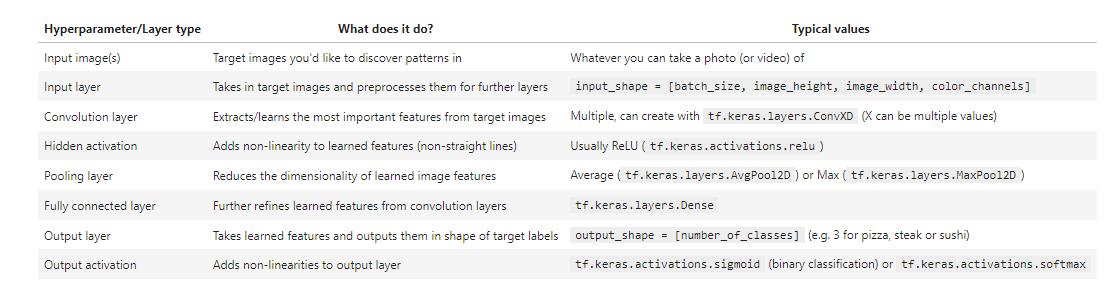

How they stack together:

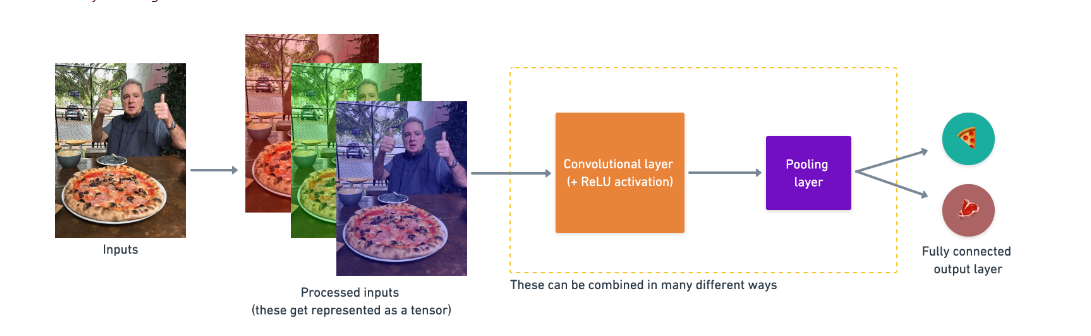

## Phase 01

In [6]:
# Fetch pizza_steak data
import zipfile

# Download zip file of pizza_steak images
!curl -O https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  104M    0  2710    0     0   1283      0 23:42:58  0:00:02 23:42:56  1284
  0  104M    0 45901    0     0  19233      0  1:34:55  0:00:02  1:34:53 19237
  0  104M    0  934k    0     0   281k      0  0:06:20  0:00:03  0:06:17  281k
  2  104M    2 2478k    0     0   568k      0  0:03:08  0:00:04  0:03:04  568k
  3  104M    3 3870k    0     0   717k      0  0:02:29  0:00:05  0:02:24  775k
  4  104M    4 5006k    0     0   791k      0  0:02:15  0:00:06  0:02:09 1187k
  6  104M    6 6686k    0     0   908k      0  0:01:57  0:00:07  0:01:50 1335k
  7  104M    7 7950k    0     0   955k      0  0:01:51  0:00:08  0:01:43 1403k
  8  104M    8 9038k    0     0   968k      0  0:01

Start with a smaller dataset for faster experimentation

### Data Exploration

In [7]:
ls pizza_steak

 Volume in drive D is New Volume
 Volume Serial Number is 0489-26E8

 Directory of D:\Learning\Learning Code\Machine Learning\ZTM TF Tutorials\pizza_steak

09/22/2022  10:50 AM    <DIR>          .
09/22/2022  10:52 AM    <DIR>          ..
09/22/2022  10:50 AM    <DIR>          test
09/22/2022  10:50 AM    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  274,227,265,536 bytes free


In [11]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in \'{dirpath}\'.')

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [12]:
len(os.listdir('pizza_steak/train/steak'))

750

In [13]:
# Get the class names
import pathlib
import numpy as np

# turn the path into a Python path
data_dir = pathlib.Path('pizza_steak/train/')

# create a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [16]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(f'{target_folder}/{random_image[0]}')
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    
    print(f'Image shape: {img.shape}')
    return img

Image shape: (341, 512, 3)


array([[[165, 118, 102],
        [165, 118, 102],
        [164, 116, 102],
        ...,
        [ 44,  53,  62],
        [ 42,  51,  58],
        [ 41,  50,  57]],

       [[167, 125, 113],
        [166, 124, 112],
        [163, 120, 111],
        ...,
        [ 42,  49,  57],
        [ 40,  47,  53],
        [ 39,  46,  52]],

       [[180, 149, 146],
        [178, 147, 144],
        [173, 142, 140],
        ...,
        [ 39,  46,  54],
        [ 36,  43,  49],
        [ 34,  41,  47]],

       ...,

       [[144, 140, 167],
        [143, 139, 166],
        [141, 137, 164],
        ...,
        [119, 104,  85],
        [109,  94,  75],
        [ 96,  81,  62]],

       [[143, 137, 165],
        [142, 136, 164],
        [139, 133, 159],
        ...,
        [119, 104,  85],
        [108,  93,  74],
        [ 95,  80,  61]],

       [[139, 133, 161],
        [138, 132, 160],
        [136, 130, 156],
        ...,
        [119, 104,  85],
        [108,  93,  74],
        [ 95,  80,  61]]

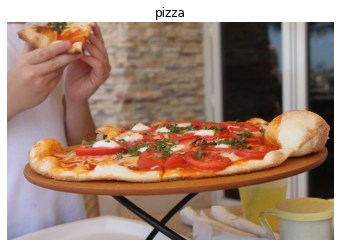

In [22]:
view_random_image(
    target_dir='pizza_steak/train/',
    target_class='pizza',
)